# Quantitative Finance Model using Donadio and Ghosh Learn Algorithmic Trading Chapter 2 STDEV & MOM Examples
### David Lowe
### August 8, 2022

NOTE: This script is for learning purposes only and does not constitute a recommendation for buying or selling any stock mentioned in this script.

SUMMARY: This project aims to construct and test an algorithmic trading model and document the end-to-end steps using a template.

INTRODUCTION: This script aims to replicate the STDEV and MOM examples found in chapter two of the book Learn Algorithmic Trading by Sebastien Donadio and Sourav Ghosh. The script seeks to validate the Python environment and package requirements for running these code examples successfully. The eventual goal is to integrate various example code segments from the book into an end-to-end algorithmic trading system.

Dataset ML Model: Time series analysis with numerical attributes

Dataset Used: Sharadar US Equities and Fund Prices from Quandl/Nasdaq Data Link

Source and Further Discussion of the Code Examples: https://github.com/PacktPublishing/Learn-Algorithmic-Trading

# Task 1 - Prepare Environment

## 1.a) Load the required packages and modules

In [1]:
# import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import statistics as stats
import math
# import seaborn as sns

## 1.b) Set up the controlling parameters and functions

In [2]:
# Specify the key modeling parameters below
DATA_STORE = '../sharadar.h5'
ticker_symbol = 'GOOGL'

STDEV_WINDOW = 20 # look back period for standard derivative
MOM_WINDOW = 20 # how far to look back to find reference price to compute momentum

MODEL_START_DATE = date(2014, 1, 1)
print("Starting date for the model:", MODEL_START_DATE)

# MODEL_END_DATE = datetime.now().date()
MODEL_END_DATE = date(2018, 12, 31)
print("Ending date for the model:", MODEL_END_DATE)

Starting date for the model: 2014-01-01
Ending date for the model: 2018-12-31


# Task 2 - Acquire and Pre-Process Data

## Instead of using pandas-datareader like in the book example, this script will use a home-grown data source.

In [3]:
with pd.HDFStore(DATA_STORE) as store:
    goog_data = (store['quandl/sharadar/sep'].loc[[ticker_symbol], ['open', 'high', 'low', 'closeadj', 'volume']])
goog_data.reset_index(level=0, inplace=True)
goog_data.sort_index(inplace=True)
goog_data = goog_data[MODEL_START_DATE:MODEL_END_DATE]
goog_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-01-02 to 2018-12-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    1258 non-null   object 
 1   open      1258 non-null   float64
 2   high      1258 non-null   float64
 3   low       1258 non-null   float64
 4   closeadj  1258 non-null   float64
 5   volume    1258 non-null   float64
dtypes: float64(5), object(1)
memory usage: 68.8+ KB


# Task 3 - Build model with the STDEV indicator

## This code segment implements and visualizes standard derivatives.

In [4]:
close = goog_data['closeadj']
history = [] # history of prices
sma_values = [] # to track moving average values for visualization purposes
stddev_values = [] # history of computed stdev values

for close_price in close:
    history.append(close_price)
    if len(history) > STDEV_WINDOW: # we track at most 'time_period' number of prices
        del (history[0])

    sma = stats.mean(history)
    sma_values.append(sma)
    variance = 0 # variance is square of standard deviation
    for hist_price in history:
        variance = variance + ((hist_price - sma) ** 2)

    stdev = math.sqrt(variance / len(history))
    stddev_values.append(stdev)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(StandardDeviationOver20Days=pd.Series(stddev_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
stddev = goog_data['StandardDeviationOver20Days']
print(stddev.head())

date
2014-01-02    0.000000
2014-01-03    0.101500
2014-01-06    0.127845
2014-01-07    0.313226
2014-01-08    0.360327
Name: StandardDeviationOver20Days, dtype: float64


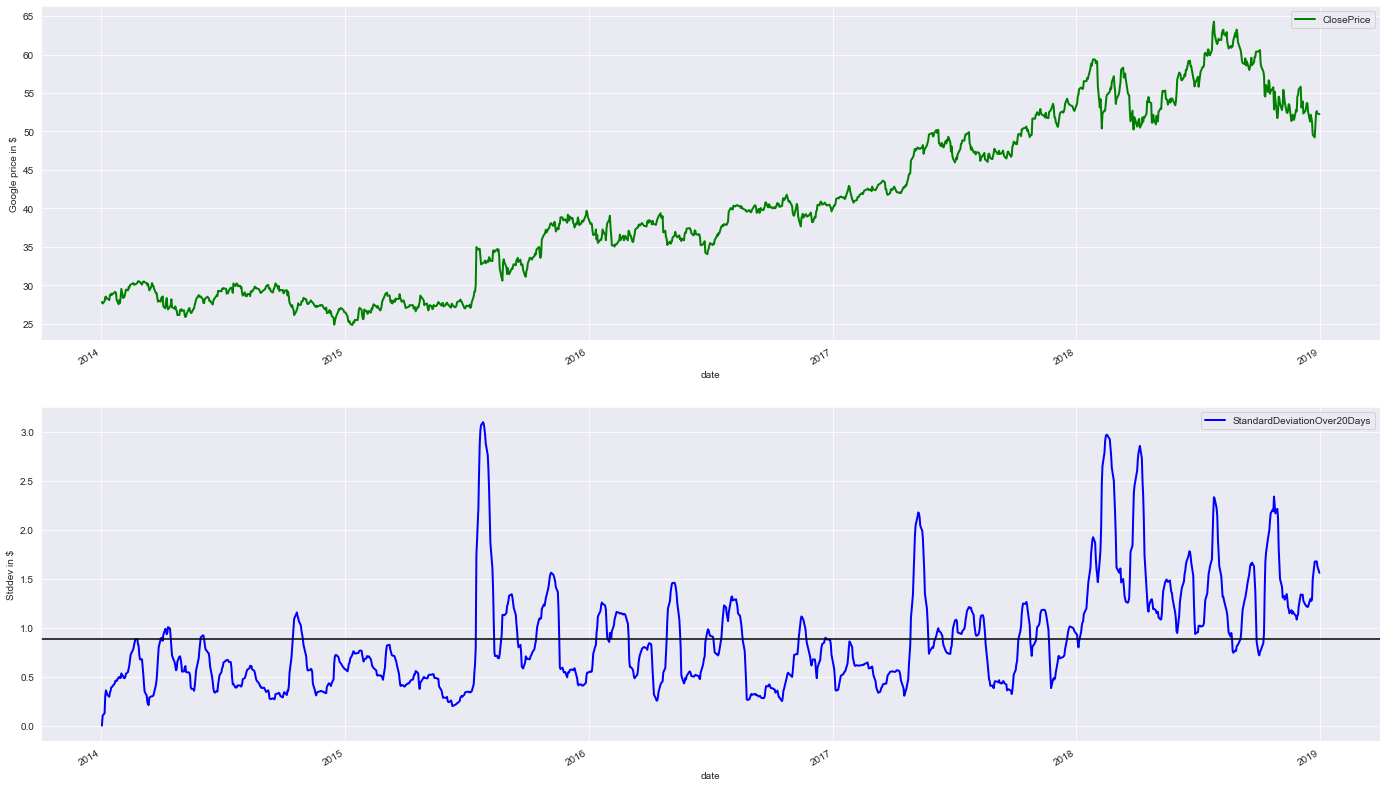

In [5]:
fig = plt.figure(figsize=(24, 15))
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Stddev in $')
stddev.plot(ax=ax2, color='b', lw=2., legend=True)
ax2.axhline(y=stats.mean(stddev_values), color='k')
plt.show()

# Task 4 - Build model with the MOM indicator

## This code segment implements and plots momentum on our dataset.

In [7]:
close = goog_data['closeadj']
history = [] # history of observed prices to use in momentum calculation
mom_values = [] # track momentum values for visualization purposes

for close_price in close:
  history.append(close_price)
  if len(history) > MOM_WINDOW: # history is at most 'time_period' number of observations
    del (history[0])

  mom = close_price - history[0]
  mom_values.append(mom)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(MomentumFromPrice20DaysAgo=pd.Series(mom_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
mom = goog_data['MomentumFromPrice20DaysAgo']
print(mom.head())

date
2014-01-02    0.000
2014-01-03   -0.203
2014-01-06    0.105
2014-01-07    0.644
2014-01-08    0.703
Name: MomentumFromPrice20DaysAgo, dtype: float64


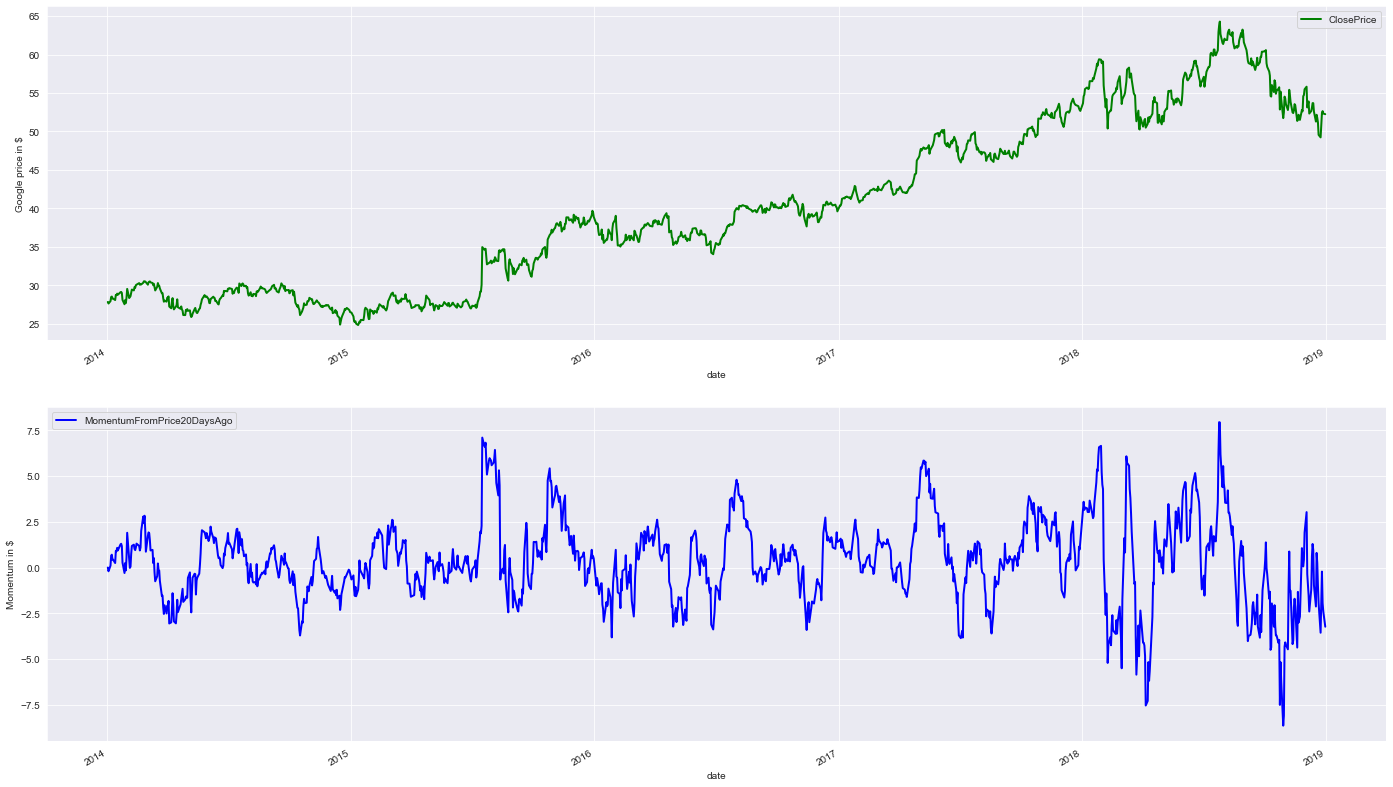

In [8]:
fig = plt.figure(figsize=(24, 15))
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Momentum in $')
mom.plot(ax=ax2, color='b', lw=2., legend=True)
plt.show()